

**Problem Statement:** Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into
categories.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [ ]:
# Load the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Print the shape of the training and test sets
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


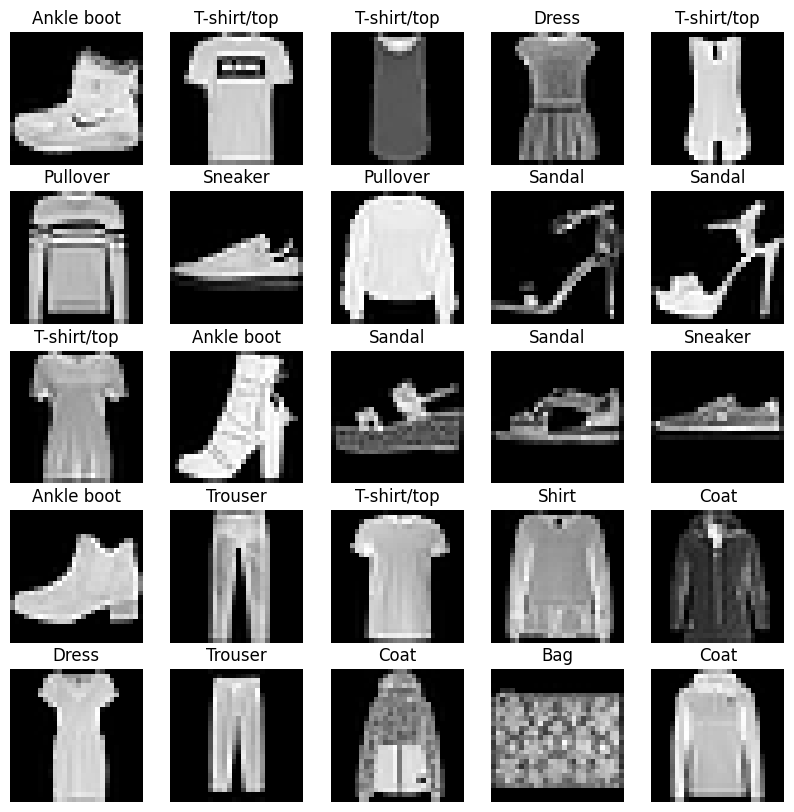

In [ ]:
import matplotlib.pyplot as plt

# Define class labels for Fashion MNIST
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Display a few images along with their labels
plt.figure(figsize=(10, 10))
for i in range(25):  # Change this number to display more or fewer images
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')  # Displaying grayscale images
    plt.title(class_labels[y_train[i]])
    plt.axis('off')
plt.show()


In [ ]:
# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to have a single channel (grayscale images)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
model = Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 10s 8ms/step - loss: 0.7035 - accuracy: 0.7468 - val_loss: 0.4180 - val_accuracy: 0.8455
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4422 - accuracy: 0.8408 - val_loss: 0.3667 - val_accuracy: 0.8691
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3881 - accuracy: 0.8622 - val_loss: 0.3303 - val_accuracy: 0.8775
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3527 - accuracy: 0.8723 - val_loss: 0.3025 - val_accuracy: 0.8900
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3255 - accuracy: 0.8824 - val_loss: 0.3012 - val_accuracy: 0.8900
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3071 - accuracy: 0.8896 - val_loss: 0.2797 - val_accuracy: 0.8978
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2902 - accuracy: 0.8956 - val_loss: 0.2712 - val_accuracy: 0.8998
Epoch

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


313/313 [==============================] - 1s 3ms/step - loss: 0.2702 - accuracy: 0.9031
Test Accuracy: 0.9031000137329102


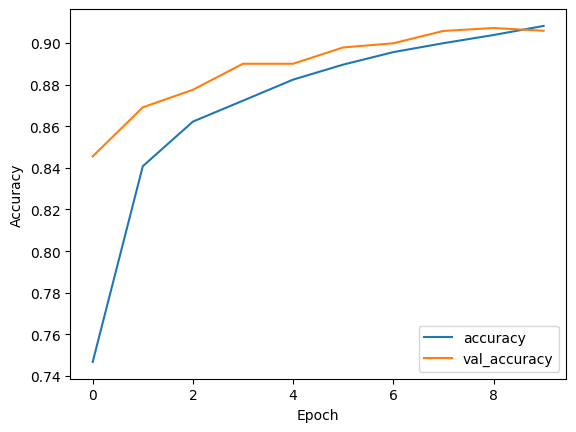

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
